# Question 1

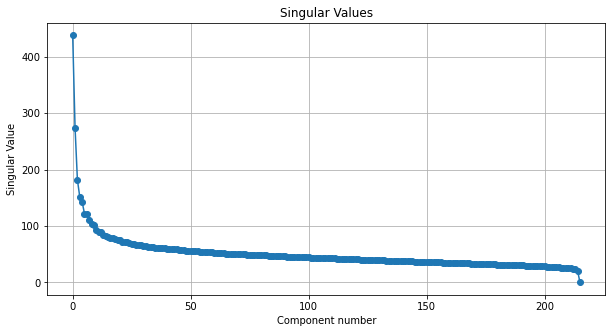

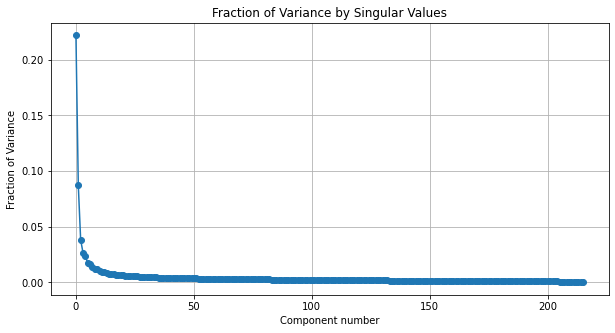

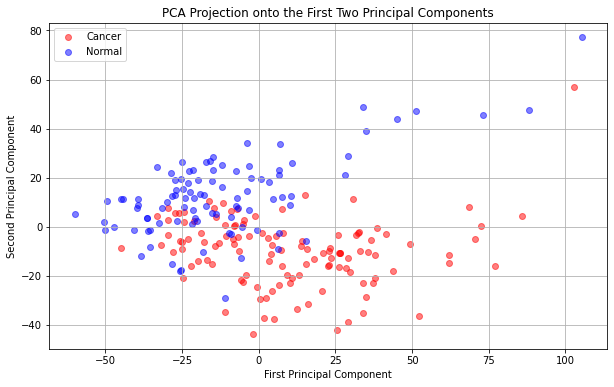

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Load the ovarian cancer dataset
data = pd.read_csv('ovarian_cancer.csv')

# Assuming 'status' column contains labels and the rest are features
X = data.drop(columns=['status', 'patients'])  # Exclude non-numeric and label columns
y = data['status']  # Labels for coloring the PCA plot

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Perform PCA using SVD
pca = PCA()
X_pca = pca.fit_transform(X_scaled)
singular_values = pca.singular_values_
explained_variance_ratio = pca.explained_variance_ratio_

# Calculate the fraction of variance for each singular value
fraction_of_variance = singular_values ** 2 / np.sum(singular_values ** 2)

# Plot singular values
plt.figure(figsize=(10, 5))
plt.plot(singular_values, marker='o')
plt.title('Singular Values')
plt.xlabel('Component number')
plt.ylabel('Singular Value')
plt.grid(True)
plt.show()

# Plot fraction of variance corresponding to each singular value
plt.figure(figsize=(10, 5))
plt.plot(fraction_of_variance, marker='o')
plt.title('Fraction of Variance by Singular Values')
plt.xlabel('Component number')
plt.ylabel('Fraction of Variance')
plt.grid(True)
plt.show()

# Plot the reduced data projection onto the first two principal components
plt.figure(figsize=(10, 6))
colors = {'Cancer': 'red', 'Normal': 'blue'}  # Adjust these colors based on actual labels in the dataset
for label, color in colors.items():
    mask = y == label
    plt.scatter(X_pca[mask, 0], X_pca[mask, 1], color=color, label=label, alpha=0.5)
plt.title('PCA Projection onto the First Two Principal Components')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.legend()
plt.grid(True)
plt.show()


# Question 2


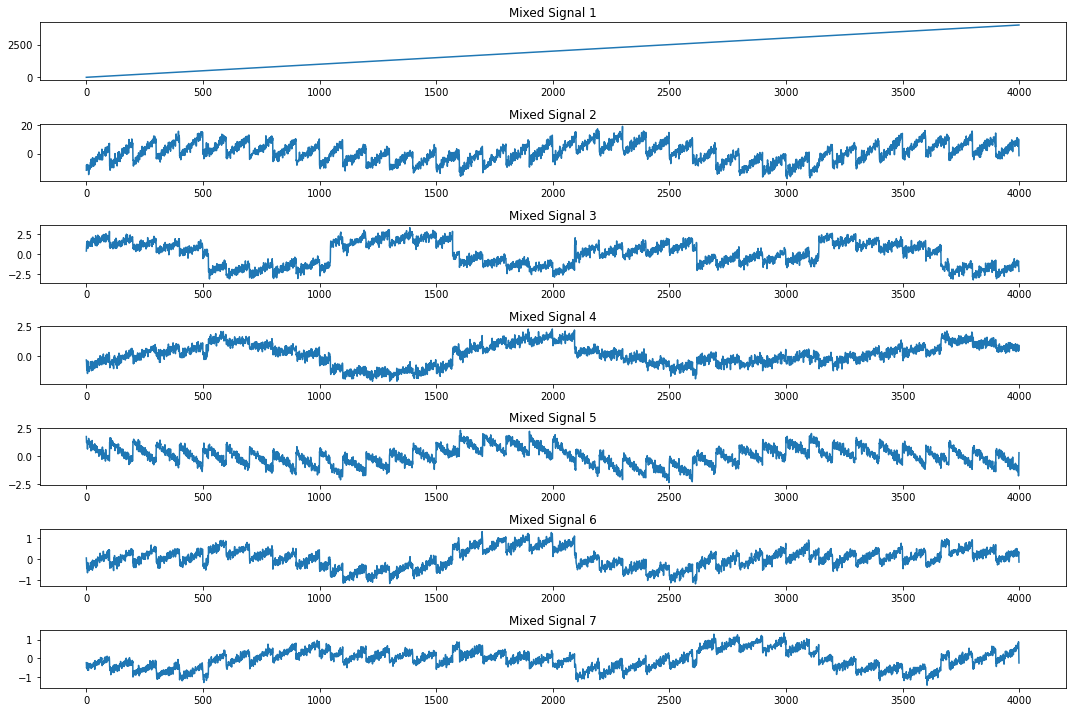

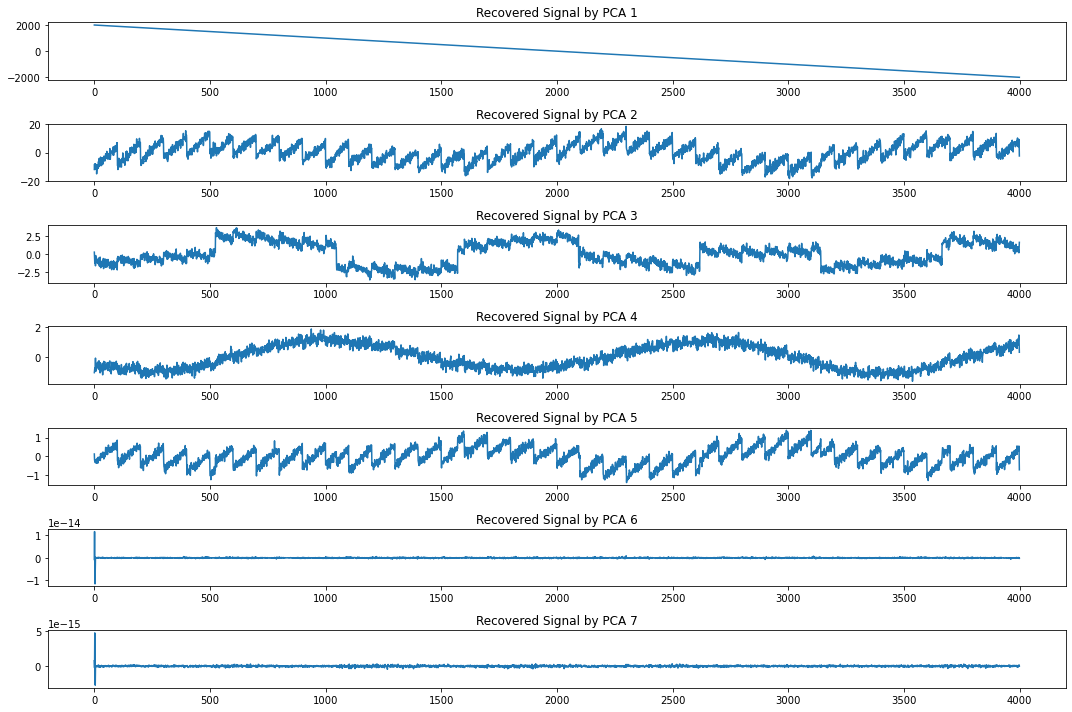

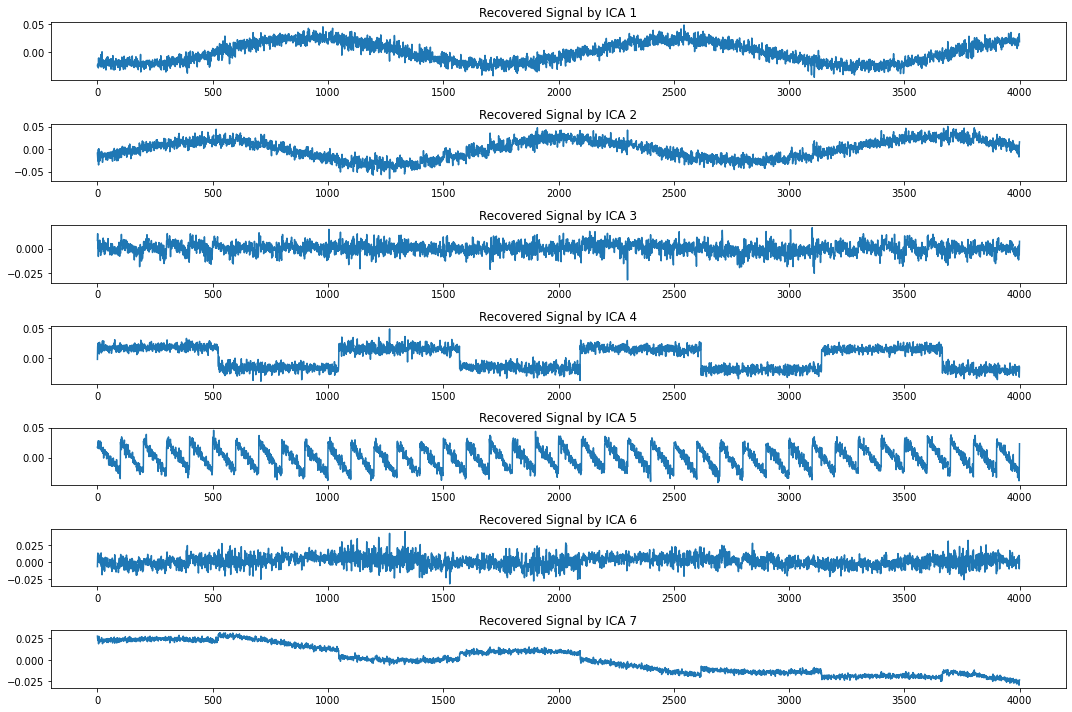

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA, FastICA

# Load the mixed signals dataset
signals = pd.read_csv('mixed_signals.csv')

# Convert to numpy array if not already
X = signals.values

# Plot original mixed signals
plt.figure(figsize=(15, 10))
for i in range(X.shape[1]):
    plt.subplot(X.shape[1], 1, i + 1)
    plt.plot(X[:, i])
    plt.title(f'Mixed Signal {i+1}')
plt.tight_layout()
plt.show()

# Apply PCA
pca = PCA(n_components=X.shape[1])
X_pca = pca.fit_transform(X)

# Plot signals recovered by PCA
plt.figure(figsize=(15, 10))
for i in range(X_pca.shape[1]):
    plt.subplot(X_pca.shape[1], 1, i + 1)
    plt.plot(X_pca[:, i])
    plt.title(f'Recovered Signal by PCA {i+1}')
plt.tight_layout()
plt.show()

# Apply ICA
ica = FastICA(n_components=X.shape[1])
X_ica = ica.fit_transform(X)

# Plot signals recovered by ICA
plt.figure(figsize=(15, 10))
for i in range(X_ica.shape[1]):
    plt.subplot(X_ica.shape[1], 1, i + 1)
    plt.plot(X_ica[:, i])
    plt.title(f'Recovered Signal by ICA {i+1}')
plt.tight_layout()
plt.show()


# Question 3


In [8]:
import numpy as np
from sklearn.decomposition import PCA

def first_principal_component(X):
    pca = PCA(n_components=1)
    pca.fit(X)
    return pca.components_, pca.explained_variance_ratio_

# Use the function
X, y = make_moons(n_samples=200, random_state=123)
first_comp, variance_ratio = first_principal_component(X)
print("First Principal Component:", first_comp)
print("Explained Variance Ratio:", variance_ratio)



First Principal Component: [[-0.94952219  0.31369988]]
Explained Variance Ratio: [0.81993682]


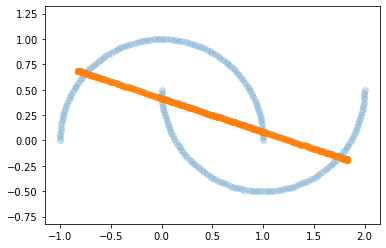

In [9]:
def plot_projection(X):
    pca = PCA(n_components=1)
    X_proj = pca.fit_transform(X)
    X_new = pca.inverse_transform(X_proj)  # Project back to original space

    plt.scatter(X[:, 0], X[:, 1], alpha=0.2)
    plt.scatter(X_new[:, 0], X_new[:, 1], alpha=0.8)
    plt.axis('equal')
    plt.show()

plot_projection(X)


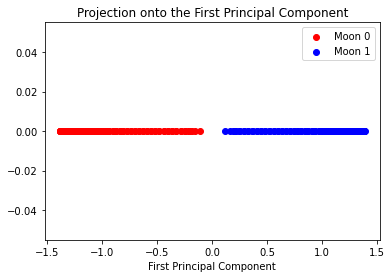

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons

def rbf_kernel(X, gamma):
    sq_dists = np.linalg.norm(X[:, np.newaxis] - X, axis=2, ord=2) ** 2
    K = np.exp(-gamma * sq_dists)
    return K

def center_kernel(K):
    N = K.shape[0]
    one_n = np.ones((N, N)) / N
    K_centered = K - one_n @ K - K @ one_n + one_n @ K @ one_n
    return K_centered

def kernel_pca(X, gamma=15):
    K = rbf_kernel(X, gamma)
    K_centered = center_kernel(K)
    eigenvalues, eigenvectors = np.linalg.eigh(K_centered)
    idx = np.argsort(eigenvalues)[::-1]
    eigenvectors = eigenvectors[:, idx]
    return eigenvectors[:, 0]  # Return the first principal component

# Example usage
X, y = make_moons(n_samples=200, random_state=123)
first_component = kernel_pca(X)

def plot_projection(K, first_component, y):
    projections = K @ first_component
    plt.scatter(projections[y == 0], np.zeros((sum(y == 0))), color='red', label='Moon 0')
    plt.scatter(projections[y == 1], np.zeros((sum(y == 1))), color='blue', label='Moon 1')
    plt.title('Projection onto the First Principal Component')
    plt.xlabel('First Principal Component')
    plt.legend()
    plt.show()

# Re-generate the kernel matrix for plotting
K = rbf_kernel(X, gamma=15)
plot_projection(K, first_component, y)
